# Best synchronization parameters

In this notebook, we are going to analyze the fitting parameters of the first simulation with different maximum synchronicity values. This stems from the observation that, using Gustavo Patow's WholeBrain model, we get infinite values for G > 3 if we use 0.2 as the maximum value of the SC matrix (e.g., in the first step, where we normalize the SC and divide everything by the max value and then multiply by 0.2). A similar issue is also reported in [this paper][def].

[def]: https://www.biorxiv.org/content/10.1101/2022.10.30.514365v1

In [25]:
# Imports and directories
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

SPINE = Path.cwd().parents[2]
DATA_DIR = SPINE / "data"
RES_DIR = SPINE / "results"
G_DIR = RES_DIR / "Finding_best_G"
SYNCH_DIR = G_DIR / "Best_synch"

In [2]:
# Load dictionary
synch_dict = pd.read_pickle(SYNCH_DIR / "optimal_dict_synch.pkl")
df = pd.DataFrame.from_dict({(i,j): synch_dict[i][j] 
                           for i in synch_dict.keys() 
                           for j in synch_dict[i].keys()},
                       orient='index')
df = df.reset_index()
df = df.rename(columns={'level_0': 'a', 'level_1':'synch'})

wes = np.arange(0, 6, .5)
df['phFCD_G'] = [list(t) for t in zip(*df['phFCD'])][1]
df['phFCD'] = [list(t) for t in zip(*df['phFCD'])][0]
df['phFCD_G'] = wes[df['phFCD_G']]

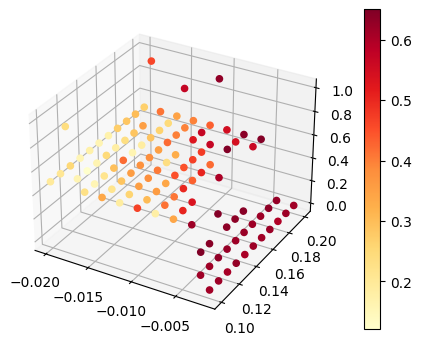

In [3]:
# Plot
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
img = ax.scatter(df['a'], df['synch'], df['phFCD_G'], c= df['phFCD'], cmap='YlOrRd', alpha=1)
plt.colorbar(img)
plt.show()

In [4]:
fitting_dict = pd.read_pickle(SYNCH_DIR / "fitting_dict_synch.pkl")

In [5]:
a = [b for b in fitting_dict.keys()]
synch = [s for s in fitting_dict[-0.02].keys()]
FC = np.array([fitting_dict[i][n]['FC'] for n in synch for i in a])
phFCD = np.array([fitting_dict[i][n]['phFCD'] for n in synch for i in a])
a_s = np.repeat(a,len(synch))
synchs= np.array(synch * len(a))
df_fit = pd.DataFrame([a_s, synchs, FC, phFCD]).T
df_fit = df_fit.rename(columns={0: 'a', 1: 'synch', 2: 'FC', 3: 'phFCD'})
df_fit = df_fit.explode(['FC', 'phFCD'])
df_fit['G'] = wes.tolist() * len(a) * len(synch)
df_fit[df_fit['FC'] == 10] = None

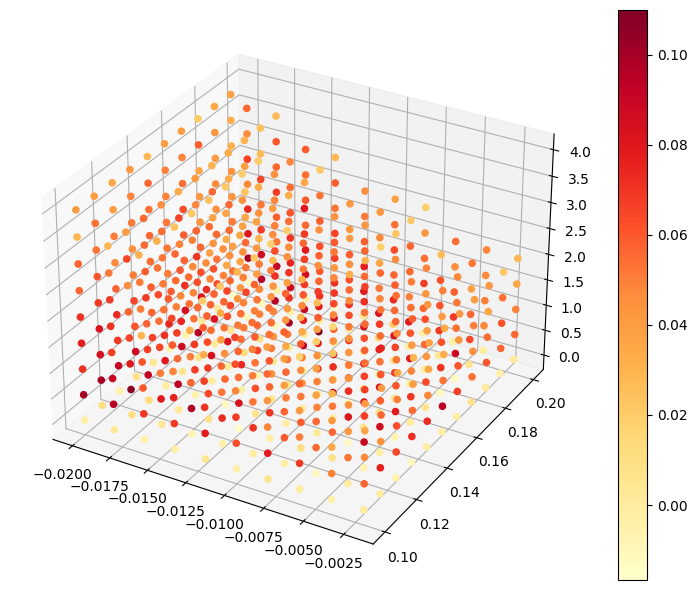

In [6]:
# Plot
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
img = ax.scatter(df_fit['a'], df_fit['synch'], df_fit['G'], c = df_fit['FC'], cmap='YlOrRd', alpha=1)
plt.colorbar(img)
plt.show()

In [22]:
df_fit[(df_fit['a'] == -0.02) & (df_fit['synch'] == 0.2)]

,a,synch,FC,phFCD,G
10,-0.02,0.2,-0.01278,0.726737,0.0
10,-0.02,0.2,0.100274,0.207058,0.5
10,-0.02,0.2,0.079656,0.273426,1.0
10,-0.02,0.2,0.074296,0.424643,1.5
10,-0.02,0.2,0.047392,0.611546,2.0
10,-0.02,0.2,0.067156,0.617245,2.5
10,-0.02,0.2,0.046655,0.550034,3.0
10,-0.02,0.2,0.055789,0.70495,3.5


In [26]:
fitting_dict = pd.read_pickle(RES_DIR / "Finding_best_G" / "AvgHC" /"fitting_dict_synch.pkl")

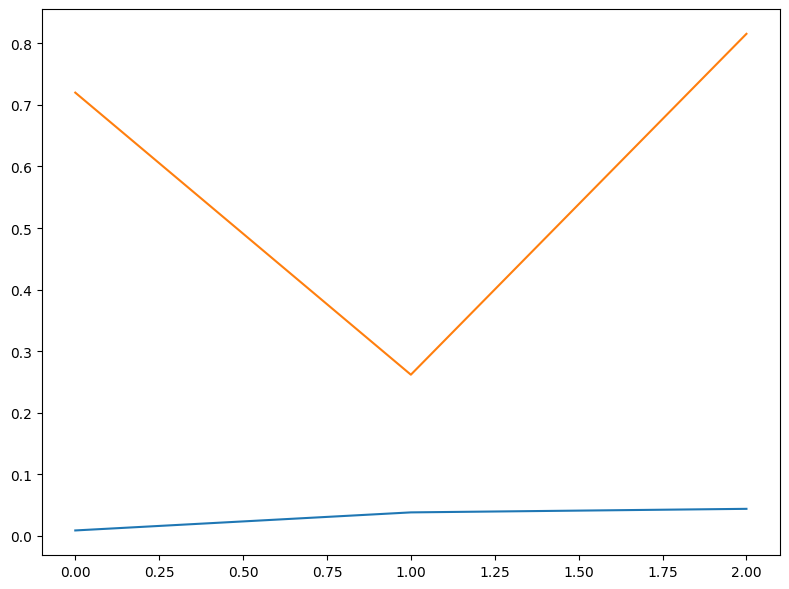

In [29]:
plt.plot(np.arange(0,3,1), fitting_dict['FC'], '-')
plt.plot(np.arange(0,3,1), fitting_dict['phFCD'], '-')